# The typical matching birthday problem...
How common is it to have matching birthdays within a group? But also have common to have consecutive birthdays...?

These questions can also be answered with empiracle data.
First step is to generate a ton of birthdays, so we create a function for that:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn-whitegrid")


def generate_birthdays(n_people: int = 15, n_trials: int = 10000, seed=None):
    rnd = np.random.default_rng(seed)
    birthdays = rnd.integers(1, 366, size=(n_people, n_trials))
    return birthdays

/var/folders/_v/nlh4h1yx2n1gd6f3szjlgxt40000gr/T/ipykernel_53240/2777328938.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


## How likely to have matching birthdays within a group?

Let's simulate birthdays and count the matches. We see that the more people we consider the higher the chance of a match.

/var/folders/_v/nlh4h1yx2n1gd6f3szjlgxt40000gr/T/ipykernel_53240/1901177028.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


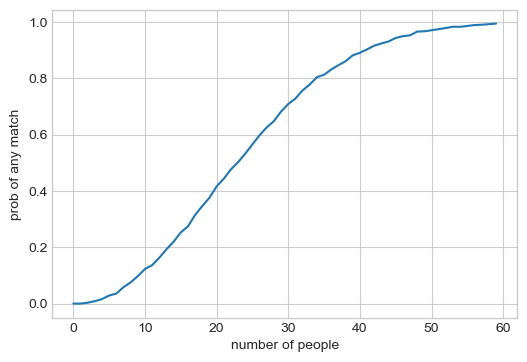

In [2]:
def find_matching_days(n_people: int = 15):
    birthdays = generate_birthdays(n_people=n_people)
    birthdays_sorted = np.sort(birthdays, axis=0)
    birthday_diff = birthdays_sorted[1:, :] - birthdays_sorted[:-1, :]
    return (birthday_diff == 0).any(axis=0).mean()


n_people_range = range(60)
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(n_people_range, [find_matching_days(_n_people) for _n_people in n_people_range])
ax.set(xlabel="number of people", ylabel="prob of any match")
fig.show()

## How likely to have consecutive birthdays within a group?

Similarly we generate birthdays, and then find trials where people have birthdays in a row.
For this we can compute it using convolution. We find the people with consecutive birthdays after sorting.
A convolution kernel of ones will find trials where multiple are consecutive.
Then we simply average the number of trials where this is the case.

/var/folders/_v/nlh4h1yx2n1gd6f3szjlgxt40000gr/T/ipykernel_53240/3067234984.py:37: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


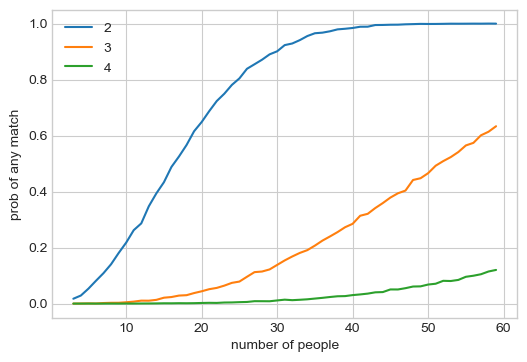

In [3]:
import scipy.signal


def find_consec_days(n_people: int = 15, n_days: int = 3):
    birthdays = generate_birthdays(n_people=n_people)
    birthdays_sorted = np.sort(birthdays, axis=0)

    # pad extra to make circular
    birthdays_sorted_offset = np.vstack(
        [birthdays_sorted, 365 + birthdays_sorted[[0], :]]
    )
    birthdays_diff = birthdays_sorted_offset[1:, :] - birthdays_sorted_offset[:-1, :]

    # 2d convolution
    kernel_size = n_days - 1
    valid_trials = (
        scipy.signal.convolve2d(
            birthdays_diff == 1, np.ones((kernel_size, 1)), boundary="wrap", mode="same"
        )
        == kernel_size
    ).any(axis=0)

    return valid_trials.mean(), birthdays_sorted, valid_trials


n_days = range(2, 5)
n_people_range = range(3, 60)
fig, ax = plt.subplots(figsize=(6, 4))
for _n_days in n_days:
    ax.plot(
        n_people_range,
        [find_consec_days(_n_people, _n_days)[0] for _n_people in n_people_range],
        label=_n_days,
    )
ax.set(xlabel="number of people", ylabel="prob of consecutive days")
ax.legend()
fig.show()